In [1]:
#!pip install mplfinance
#!pip install yfinance

In [2]:
#importing necessay library
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data=yf.Ticker('MUTHOOTFIN.NS')

https://in.finance.yahoo.com/quote/MUTHOOTFIN.NS?p=MUTHOOTFIN.NS&.tsrc=fin-srch 

Muthooth Finance Stock has been visualized in this code, we can just get the symbol and put it in Ticker and run whole code
for similar outcome

Ticker returns class 'yfinance.ticker.Ticker' of the data where all history,financial,etc are present

In [18]:
name=data.info['longName'] #Saving company name for using while plotting
save=data.info['shortName'] #Saving to downlad the plot
data.info#to get information about all the data

{'zip': '682018',
 'sector': 'Financial Services',
 'fullTimeEmployees': 25554,
 'longBusinessSummary': 'Muthoot Finance Limited operates as a gold financing company in India. It provides personal and business loans secured by gold jewelry, or gold loans primarily to individuals; micro finance; and loans to landlords. The company also offers gold coins, money transfer, foreign exchange, insurance, ATM, wealth succession, and housing finance services; mutual funds and non-convertible debentures; and wealth management services, including risk evaluation, client evaluation, value analysis, and consultancy. In addition, the company provides Travel Jango that provides international and domestic air ticketing service, Visa services and assistance, tour packages, hotel booking, travel insurance, and bus ticketing services. Further, it generates electric power through wind. As of March 31, 2020, the company operated approximately 4,567 branches in 29 states. Muthoot Finance Limited was founded

In [5]:
#importing historical data of stock with maximum avilable
stock_data=data.history(period='max')
#data is retured as pandas dataframe
stock_data.head()
#DATE is set as an index but mplfinance accepts date column in datetime format whereas it is given in object type.

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-05-06,150.080901,151.836670,123.209846,134.278885,60613615,0.0,0
2011-05-09,132.828469,137.217916,128.820714,130.805511,6129552,0.0,0
2011-05-10,130.538338,135.423978,129.393265,134.622437,5514954,0.0,0
2011-05-11,135.118603,136.416350,131.607042,133.668182,3348158,0.0,0
2011-05-12,132.828467,133.133815,125.996200,129.049728,2719399,0.0,0


In [6]:
#Resetting index to none
stock_data.reset_index(inplace=True)
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [7]:
stock_data.Date=pd.to_datetime(stock_data.Date)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2425 non-null   datetime64[ns]
 1   Open          2425 non-null   float64       
 2   High          2425 non-null   float64       
 3   Low           2425 non-null   float64       
 4   Close         2425 non-null   float64       
 5   Volume        2425 non-null   int64         
 6   Dividends     2425 non-null   float64       
 7   Stock Splits  2425 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 151.7 KB


Now Date Column is convereted into Datetime datatype.

Now setting it back to index

In [8]:
stock=stock_data.set_index('Date')
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-05-06,150.080901,151.836670,123.209846,134.278885,60613615,0.0,0
2011-05-09,132.828469,137.217916,128.820714,130.805511,6129552,0.0,0
2011-05-10,130.538338,135.423978,129.393265,134.622437,5514954,0.0,0
2011-05-11,135.118603,136.416350,131.607042,133.668182,3348158,0.0,0
2011-05-12,132.828467,133.133815,125.996200,129.049728,2719399,0.0,0


In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2425 entries, 2011-05-06 to 2021-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2425 non-null   float64
 1   High          2425 non-null   float64
 2   Low           2425 non-null   float64
 3   Close         2425 non-null   float64
 4   Volume        2425 non-null   int64  
 5   Dividends     2425 non-null   float64
 6   Stock Splits  2425 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 151.6 KB


In [10]:
#Function to save figure
import time,os
def figsave(horizan):
    if os.path.exists('{}_{}.png'.format(save,horizan)):
        fname='{}_{}_{}.png'.format(save,horizan,int(time.time()))
    else:
        fname='{}_{}.png'.format(save,horizan)
    return fname
        

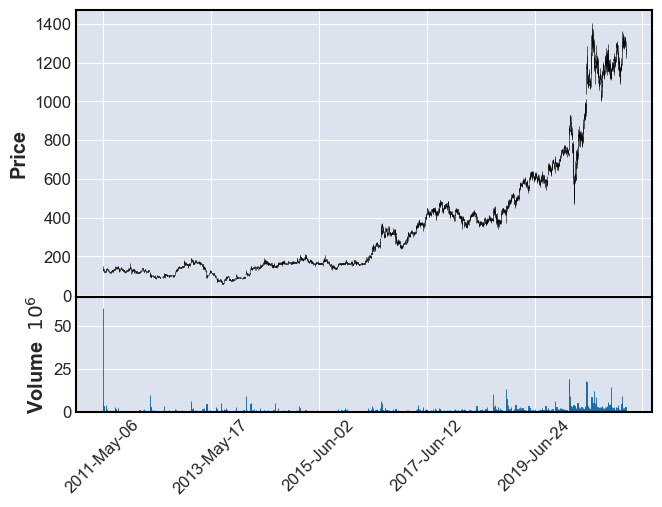

In [11]:
#Full Historical Chart
mpf.plot(stock,volume=True,type='candle',
        #savefig=dict(fname=figsave("full"),dpi=1200)
        )

<ipython-input-12-5c9dfdb474ed>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock['2020-03'],


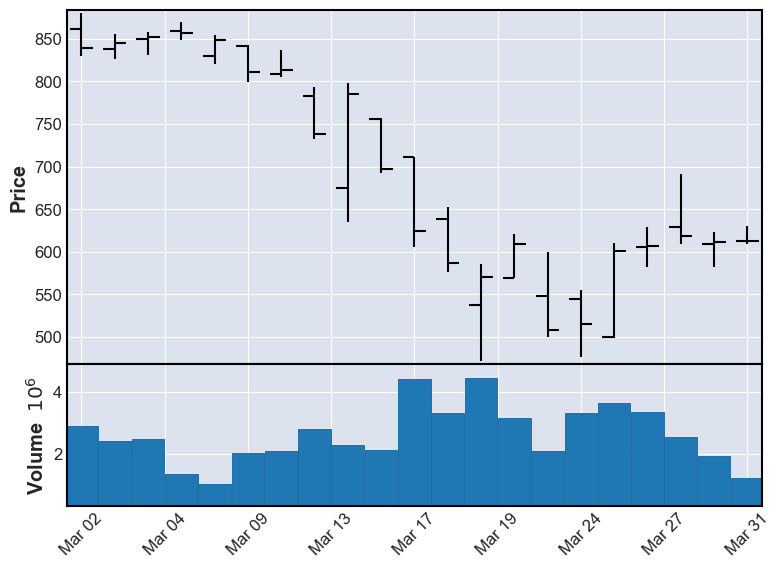

In [12]:
mpf.plot(stock['2020-03'],
         volume=True,
         tight_layout=True,
         #savefig=dict(fname=figsave("thisMonth"),dpi=1200)
        )

In [13]:
import datetime
x=datetime.datetime.now()
y=str(x.year-1)+'-'+str(x.strftime("%m"))
z=str(x.year)+'-'+str(int(x.strftime("%m"))-1)

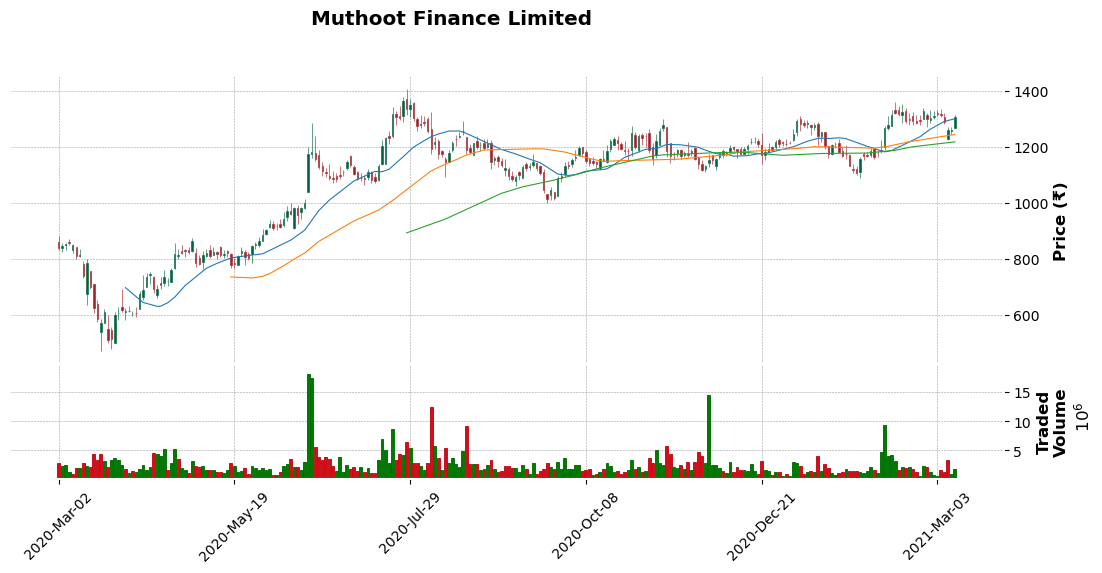

In [14]:
#Last one year chart
s  = mpf.make_mpf_style(base_mpf_style='charles',mavcolors=['#1f77b4','#ff7f0e','#2ca02c'])
mpf.plot(stock[y:],
         volume=True,
         type='candle',
        figratio=(24,10),
         mav=(20,50,100),
         style= s,
         ylabel='Price (₹)',
         title=name,
         ylabel_lower='Traded\nVolume',
         tight_layout=False,
         #savefig=dict(fname=figsave("Year"),dpi=1200)
         #show_nontrading=True if needed to show trading day gaps
        )

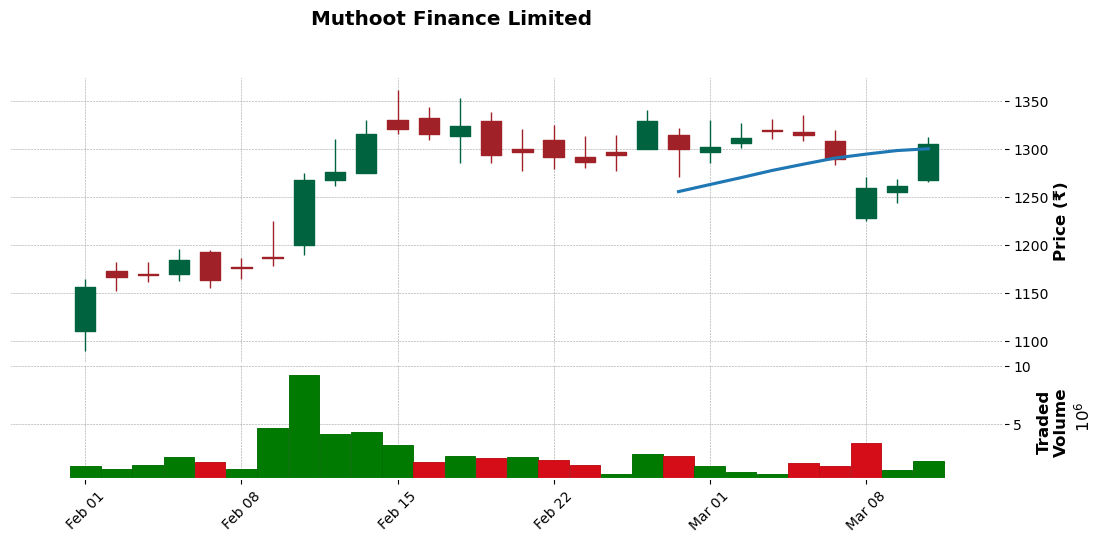

In [15]:
#Last One Month
s  = mpf.make_mpf_style(base_mpf_style='charles',mavcolors=['#1f77b4','#ff7f0e','#2ca02c'])
mpf.plot(stock[z:],
         volume=True,
         type='candle',
        figratio=(24,10),
         mav=(20,50,100),
         style= s,
         ylabel='Price (₹)',
         title=name,
         ylabel_lower='Traded\nVolume',
         tight_layout=False,
         #savefig=dict(fname=figsave("Month"),dpi=1200)
         #show_nontrading=True if needed to show trading day gaps
        )



# To Save the figure plotted just remove # from savefig (given in all plot ) and run the code , It will not display plot on jyupter notebook but will save in current directory.

To save while displaying, currently inprogress therefore code will be updated once its done.